<a href="https://colab.research.google.com/github/carlosfmorenog/MLCyberSec/blob/main/Example_FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Detection in Python

In [1]:
# Cloning the GitHub repository
!git clone https://github.com/carlosfmorenog/MLCyberSecBiometrics

Cloning into 'MLCyberSecBiometrics'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 38 (delta 4), reused 16 (delta 1), pack-reused 0
Receiving objects: 100% (38/38), 2.97 MiB | 6.46 MiB/s, done.
Resolving deltas: 100% (4/4), done.


## Fundamentals of face detection

The human face innately has features (most of the times)!
- nose
- eyes
- ears
- lips
- etc

As humans, we use those features to recognise other individuals

Then why wouldn't a machine use them as well?!

One of the first and most famous frameworks for face detection was presented in 2001 by Paul Viola and Michael Jones, often referred to as the [Viola-Jones](https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework) object detection framework

It uses something called [Haar-like features](https://realpython.com/traditional-face-detection-python/) to detect edges (1 and 2), lines (3) and diagonals (4)
![Fig. 7. Haar-like features](https://www.dropbox.com/s/hijnqhik9jll6l3/haar.png?raw=1)

It turns out that when overlapping these features in a human face, it can help us detect areas of interest

For example, *mask 2* can help us identify the area with the eyes
![Fig. 8. Eye detection](https://www.dropbox.com/s/u70jfji3h9svq0k/haareyes.png?raw=1)

Conversely, *mask 3* can help us find the nose
![Fig. 9. Nose detection](https://www.dropbox.com/s/z70sno7xfckidat/haarnose.png?raw=1)

A simple classifier would right away deduct that, if there are eyes and nose, then there must be a face!

This is the algorithm most commonly used in commercial cameras (it is fast and easy to use)

This also explains why faces in statues and paintings get detected!

It would take me another 5 hours to explain all the details of this method, the only thing you need to know is that it is an **end-to-end approach**.

This means that authors not only proposed the feature extraction, but also the classifier!

In this case, they use a **cascading classifier** (you will sometimes find this in literature as Haar cascade)
![Fig. 10. Basics of a cascade classifier](https://www.dropbox.com/s/z98smtkkndyk0yq/cascade.png?raw=1)

This can get more complex (but also more robust) as more classifiers are used
![Fig. 11. Full cascade classifier](https://www.dropbox.com/s/ndz2mvq3xp09jol/haarcascade.png?raw=1)

There is a package called `OpenCV` in Python, which comes with a ready to use Haar cascade!

## Implementing the model

First, we need to import an image

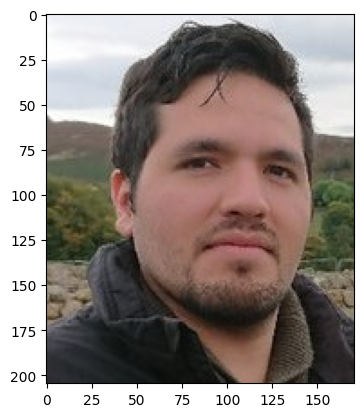

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# Read image
original_image = cv2.imread('/content/MLCyberSecBiometrics/nomask.jpg')
# show converted because cv uses BGR, not RGB
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

Then, we convert the image to grayscale so that we can apply the Viola-Jones method

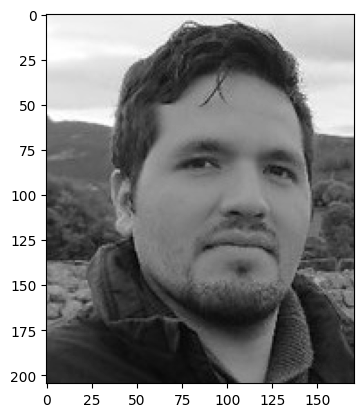

In [3]:
# Convert color image to grayscale for Viola-Jones
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
# We use "gray" to specify to plt.imshow that the image is grayscale
plt.imshow(grayscale_image, 'gray')

Then, we use the **frontalface.xml** model (which someone has already created for us). Load it here and use it to process the image using the `detectMultiScale()` function

In [4]:
# Load the classifier and create a cascade object for face detection
face_cascade = cv2.CascadeClassifier('/content/MLCyberSecBiometrics/haarcascade_frontalface_alt.xml')
# Detect faces
detected_faces = face_cascade.detectMultiScale(grayscale_image)
print(detected_faces)

[[ 54  43 107 107]]


Notice that we get four numbers! These are the coordinates where the face is found.

We can do a method to "draw" green rectangles over the faces as follows:

In [5]:
# Put rectangles in the images
for (column, row, width, height) in detected_faces:
    cv2.rectangle(original_image,(column, row),
        (column + width, row + height),
        (0, 255, 0),2)

Finally, we show the original image with the rectangle

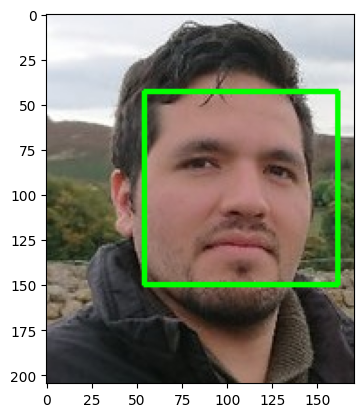

In [6]:
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

Do you think this works with a facemask?
![Fig. 12. Facemask example 1](https://www.dropbox.com/s/hu4idfcm07xk528/facemask.jpg?raw=1)

[[ 310  198  154  154]
 [1138  192  203  203]
 [ 788  323  215  215]
 [ 146  383  186  186]]


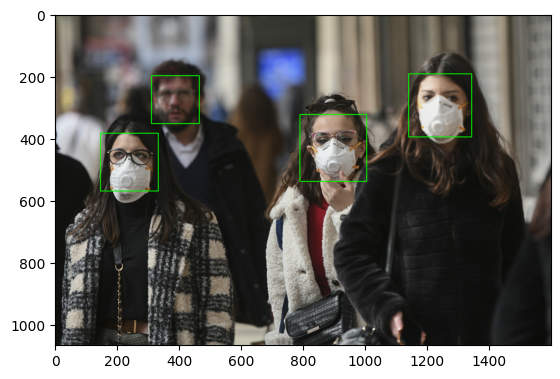

In [7]:
original_image = cv2.imread('/content/MLCyberSecBiometrics/facemask.jpg')
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
detected_faces = face_cascade.detectMultiScale(grayscale_image)
print(detected_faces)
for (column, row, width, height) in detected_faces:
    cv2.rectangle(original_image,(column, row),
        (column + width, row + height),
        (0, 255, 0),2)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

How about now?
![Fig. 13. Facemask example 2](https://www.dropbox.com/s/594o736z80aauxm/facemask2.jpg?raw=1)

()


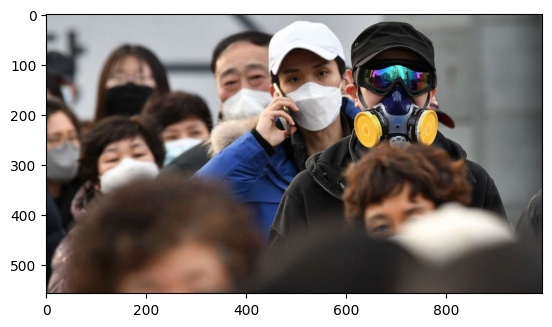

In [8]:
original_image = cv2.imread('/content/MLCyberSecBiometrics/facemask2.jpg')
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
detected_faces = face_cascade.detectMultiScale(grayscale_image)
print(detected_faces)
for (column, row, width, height) in detected_faces:
    cv2.rectangle(original_image,(column, row),
        (column + width, row + height),
        (0, 255, 0),2)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

**BONUS**: Do you think there is anything that can be done for this image?